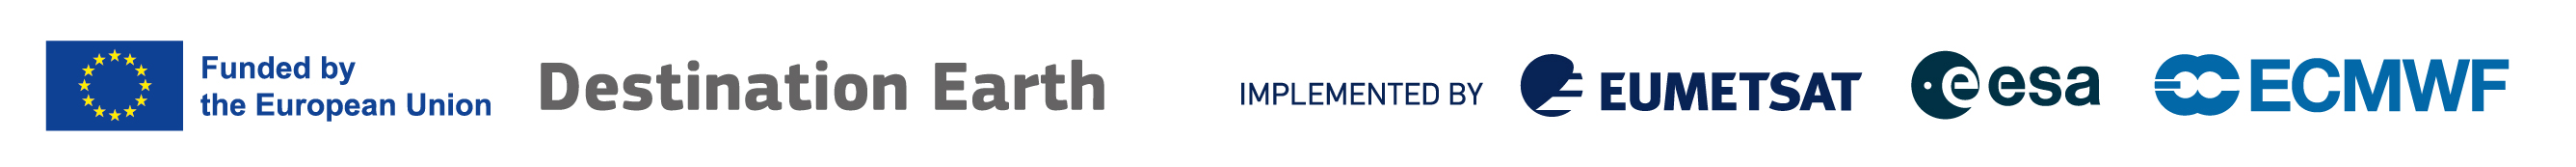

**Author:** EUMETSAT  
**Copyright:** 2024 EUMETSAT  
**Licence:** MIT   

# Create a dashboard based on Data Cube populated with data obtained from Weather and Geophysical Extremes Digital Twin (DT) - ExtremeDT

**DISCLAIMER**  
In order to deal with the code provided within this notebook, it is required to run it on user environment (local one or virtual machine).

**This notebook covers:**
* find available data cubes and their urls
* filter data area of interest
* create interactive dashboard using xcube - xviewer

**Presequites**  
* Xcube
Install xcube and create a new environment ```mamba create --name xcube --channel conda-forge xcube```  
OR  
Install xcube in the current environment  ```mamba install --channel conda-forge xcube```
* Xarray  
pip ``pip install xarray``  
OR  
conda  ```conda install -c conda-forge xarray dask netCDF4 bottleneck```

## Prepre your environment

In [1]:
from xcube.webapi.viewer import Viewer
import xarray as xr
import requests

## Connect with Extreme DT data cube
**The data cube provides data:**
* Four variables
    * 2t - Air temperature at 2 meteres above grond [K]
    * 2d - Dew point temperature at 2 meteres above grond [K]
    * sp - Surface pressure [Pa]
* Forecast 2024.04.04-13 + 96 hours for each date
* Hourly step
* World

## Select proper data cube
Data cubes on s3 bucket are stored under URL https://s3.central.data.destination-earth.eu/swift/v1/dedl_datacube.  
Data cubes are stored in two directories:
* ExtremeDT - the newest one
* archive - from preicus days
     
<b>File nameing convention:</b>  
dt_extreme_YYYYMMDD.zarr/  
YYYYMMDD - is the date when forecast starts (step 0)  

<b>Results</b>  
After exectution of code below, the list of urls linked to available cubes will be printed.

In [2]:
# URL to s3 where  ExtremeDT data cubes are stored
datacube_url = 'https://s3.central.data.destination-earth.eu/swift/v1/dedl_datacube'
response = requests.get(datacube_url)

if response.status_code == 200:
    lines = response.text.splitlines()
    zarr_items = [line for line in lines if line.endswith('.zarr') or line.endswith('.zarr/')]
    if zarr_items:
        for item in zarr_items:
            print(item)
            new_url = f"{datacube_url}/{item}"
            print("New URL:", new_url)
    else:
        print("No .zarr files or directories found.")
else:
    print("Failed to fetch contents. Status code:", response.status_code)

ExtremeDT/dt_extreme_20240404.zarr/
New URL: https://s3.central.data.destination-earth.eu/swift/v1/dedl_datacube/ExtremeDT/dt_extreme_20240404.zarr/
ExtremeDT/dt_extreme_20240405.zarr/
New URL: https://s3.central.data.destination-earth.eu/swift/v1/dedl_datacube/ExtremeDT/dt_extreme_20240405.zarr/
ExtremeDT/dt_extreme_20240406.zarr/
New URL: https://s3.central.data.destination-earth.eu/swift/v1/dedl_datacube/ExtremeDT/dt_extreme_20240406.zarr/
ExtremeDT/dt_extreme_20240407.zarr/
New URL: https://s3.central.data.destination-earth.eu/swift/v1/dedl_datacube/ExtremeDT/dt_extreme_20240407.zarr/
ExtremeDT/dt_extreme_20240408.zarr/
New URL: https://s3.central.data.destination-earth.eu/swift/v1/dedl_datacube/ExtremeDT/dt_extreme_20240408.zarr/
ExtremeDT/dt_extreme_20240410.zarr/
New URL: https://s3.central.data.destination-earth.eu/swift/v1/dedl_datacube/ExtremeDT/dt_extreme_20240410.zarr/
ExtremeDT/dt_extreme_20240411.zarr/
New URL: https://s3.central.data.destination-earth.eu/swift/v1/dedl_da

In [3]:
url = 'https://s3.waw3-1.cloudferro.com/swift/v1/s5p_l3/ExtremeDT/dt_extreme_20240412.zarr/'

### Area of interest
Upload data for selected area and verify what variables are provided. In this case uplaod data for Kenya. List of available variables should be returend.

In [22]:
kenya_bbox = [33.501,   # West
              -4.677,   # South
              41.899,   # East
              5.193]    # North

kenya_dt = xr.open_zarr(url).sel(lon=slice(kenya_bbox[0], 
                                            kenya_bbox[2]), 
                                lat=slice(kenya_bbox[3], 
                                            kenya_bbox[1]),
                                                         )

list(kenya_dt.keys())

['2d', '2t', 'sp']

## Prepare Data for visualization

### Convert units

In [6]:
kenya_dt['2t'] -= 273.15    # Conversion to Celcius degrees
kenya_dt['2d'] -= 273.15    # Conversion to Celcius degrees
kenya_dt['sp'] /= 100       # Conversion to hectoPascals

In [7]:
kenya_dt['2t'].attrs['units'] = '°C'
kenya_dt['2d'].attrs['units'] = '°C'
kenya_dt['sp'].attrs['units'] = 'hPa'

## Define style of visualization

Error message starting with:  
***404 GET /viewer/config/config.json (127.0.0.1): xcube viewer has not been been configured
404 GET /viewer/config/config.json (127.0.0.1) 2.14ms***  
could occur.  
It is normal and does not affect on proper functioning of xviewer.

In [15]:
viewer = Viewer(server_config={
    "Styles": [
        {
            "Identifier": "dt_legend",          # Style's name
            "ColorMappings": {
                "2t": {                         # Variable's name
                    "ValueRange": [10, 30],     # Variable's values range
                    "ColorBar": "coolwarm"      # colorbar
                },
                "2d": {                         # Variable's name
                    "ValueRange": [0, 20],
                    "ColorBar": "coolwarm",
                },
                'sp': {                         # Variable's name
                    "ValueRange": [0, 1000],    # Variable's values range
                    "ColorBar": "viridis"       # colorbar
                },
            }
        },
    ]
})

404 GET /viewer/config/config.json (127.0.0.1): xcube viewer has not been been configured
404 GET /viewer/config/config.json (127.0.0.1) 2.14ms
/home/patryk/miniconda3/envs/xcube_env/lib/python3.12/site-packages/xcube/core/schema.py:464: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  dim_name: cube_chunks.get(dim_name, cube.dims[dim_name])
/home/patryk/miniconda3/envs/xcube_env/lib/python3.12/site-packages/xcube/core/timecoord.py:248: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  return getattr(timestamp, round_fn)(freq).isoformat() + 'Z'
404 GET /favicon.ico (127.0.0.1) 0.52ms
404 GET /viewer/config/config.json (127.0.0.1): xcube viewer has not been been configured
404 GET /viewer/config/config.json (127.0.0.1) 1.51ms
/home/patryk/min

### Add style to the data cube

In [16]:
viewer.add_dataset(kenya_dt, 
                   style="dt_legend")

'ba3aaa64-1bdf-425d-8458-98b819c0e042'

## Run the dashboard

In [23]:
viewer.info()       # open dashboard in separate tab in browser
#viewer.show()      # open dashboard in current Jupyter Notebook

Server: http://localhost:8002
Viewer: http://localhost:8002/viewer/?serverUrl=http://localhost:8002
